In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from IPython.display import Image, display_html, display, Math, HTML

# Joint Distributions

Today we'll talk about __joint__ distributions - distributions involving more than one random quantity.

````{margin}
```{note}
The majority of the examples come from _Probabilistic Graphical Models,_, Koller and Friedman, 2009, pages 20ff.
```
````

Let's start with an example.  Consider a distribution over a population of students in a course.  Suppose we want to reason about how much students study, what grades they get, and other attributes of a student.  

We'll define categorical random variables _StudyEffort_ and _Grade_, which are properties of students.  

_StudyEffort_ can take on the values _low_, and _high_.   _Grade_ can take on the values _A_, _B_, and _C_.

To fully characterize our student population, we need to specify the __joint__ distribution of _StudyEffort_ and _Grade._

These are both categorical random variables, so the full distribution is a __table.__

For example, it could be:

$$ P(\text{Grade}, \text{StudyEffort}) = $$

| |low|high|
|---|---|---|
|A| 0.07| 0.18|
|B| 0.28| 0.09|
|C|0.35| 0.03|


On the other hand, we could also be interested in each characteristic on its own.   For example, we might be interested in the distribution of _StudyEffort_ across our population.

This is called a __marginal__ distribution.

It gets this name because it corresponds to the __marginal sums__ of the probability distribution.  

For example, 


| |low|high|marginal|
|---|---|---|---|
|A| 0.07| 0.18|0.25|
|B| 0.28| 0.09|0.37|
|C|0.35| 0.03|0.38 |
|marginal| 0.70 | 0.30| |

The marginal for an attribute value is the sum of the probabilities over all possible values of all the __other__ attributes.

So the marginal for _Grade_ is the sum across the rows, and the marginal for _StudyEffort_ is the sum across the columns.

Mathematically, we write:

$$ P(X) = \sum_y P(X, Y = y) $$

Or sometimes we would be even briefer:

$$ P(X) = \sum_Y P(X, Y) $$

(Be careful about this notation - make sure you understand when you read it that $Y$ is taking on different values, but $X$ is not.)

The same idea applies to numerical random variables. Let us first illustrate the concept on a simple example.

Assume that a fair coin is tossed three times. Let $X$ denote the number of heads on the first toss and $Y$ the total number of heads. The sample space is then equal to

$$\Omega = \{ HHH, HHT, HTH, HTT, THH, THT, TTH, TTT\}.$$

From the sample space we see that the joint probability mass (or frequency) function of $X$ and $Y$ is as given in the following table:


| | $y = 0$ |$y = 1$| $y = 2$| $y = 3$|
| :---: | :---: | :---: | :---: | :---: |
| $x = 0$ | $\frac{1}{8}$ | $\frac{2}{8}$ | $\frac{1}{8}$ | 0 |
| $x = 1$ | 0  | $\frac{1}{8}$ | $\frac{2}{8}$ | $\frac{1}{8}$ |


Thus, $p(0,2) = P(X=0, Y=2) = \frac{1}{8}.$ 

Can you find the marginal frequency function of $Y$?

Let us look at another example. Here is a set of observations of two random variables, $X_1$ and $X_2$:

In [2]:
np.random.seed(4)
from scipy.stats import multivariate_normal
df1 = pd.DataFrame(multivariate_normal.rvs(mean = np.array([1, 1]), cov = np.array([[1, 0.8],[0.8, 1]]), 
                                           size = 600),
                  columns = ['X1', 'X2'])

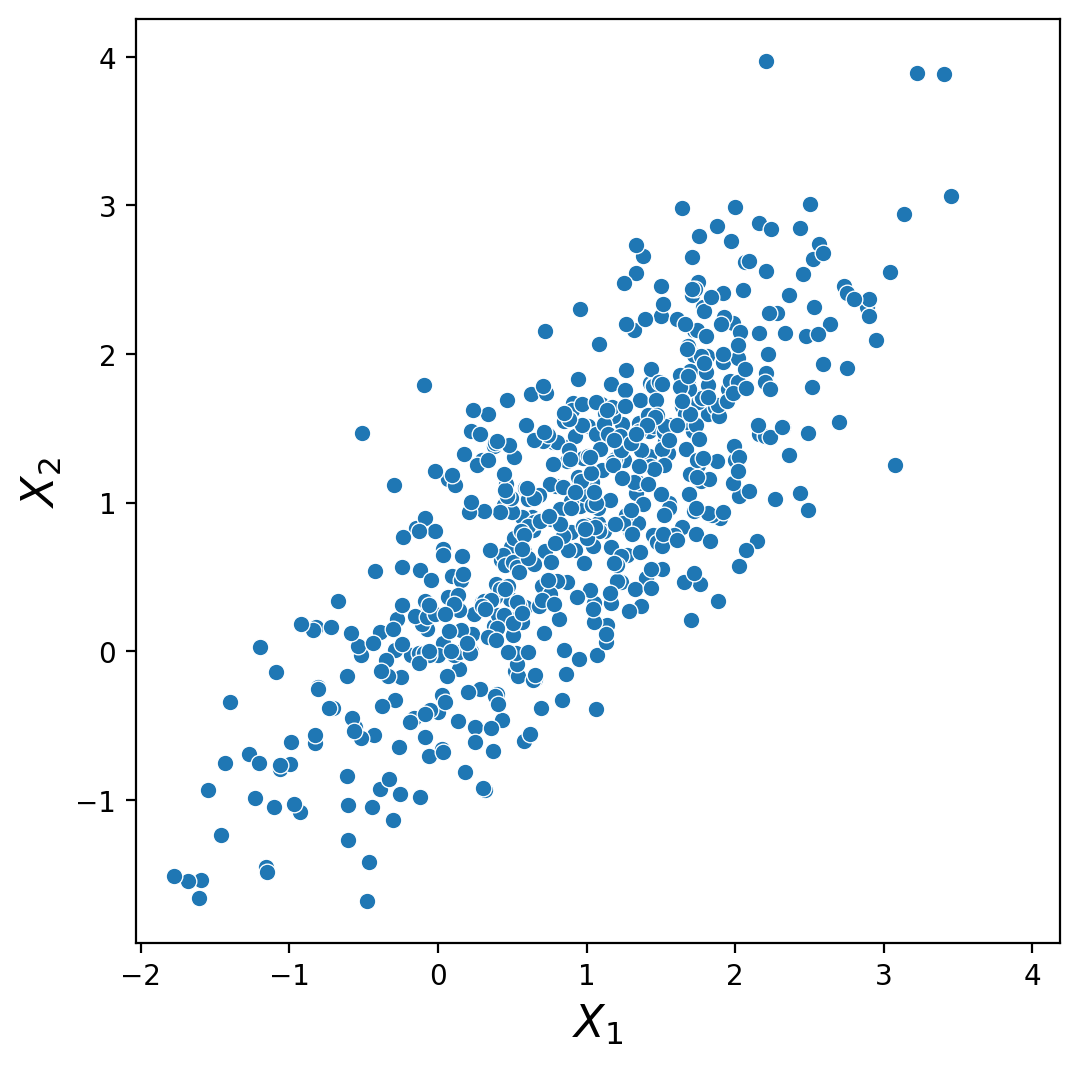

In [3]:
plt.figure(figsize = (6,6))
sns.scatterplot(data = df1, x = 'X1', y = 'X2')
plt.xlabel(r'$X_1$', fontsize=16);
plt.ylabel(r'$X_2$', fontsize=16);
plt.axis('square');

We can look at the joint distribution of the data and then calculate the marginals by summing over the joint probabilities.

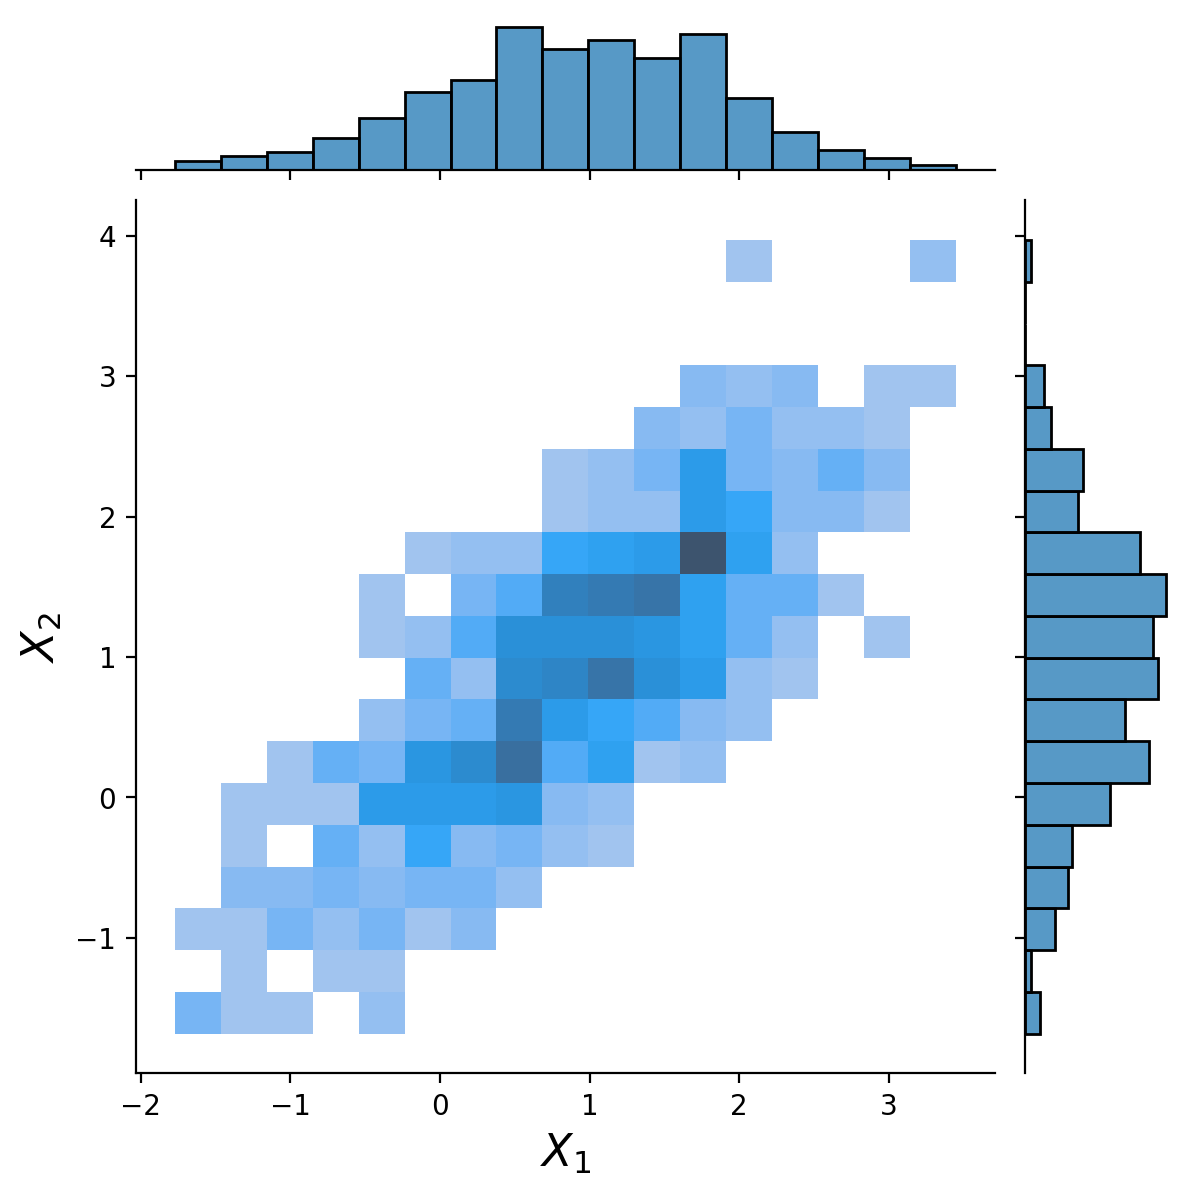

In [4]:
g = sns.JointGrid(data = df1, x = 'X1', y = 'X2', 
                   height = 6)
g.plot(sns.histplot, sns.histplot)
g.ax_joint.set_xlabel(r'$X_1$', fontsize=16)
g.ax_joint.set_ylabel(r'$X_2$', fontsize=16);

This plot summarizing the data shows:
   * the two-dimensional distribution (i.e. joint probabilities) in the center (summarized in bins, darker is more dense)
   * the two marginal distributions on the sides, as histograms (bar charts)
  

Let's consider the the actual data again. If we were given the data points, rather than the joint probabilities, could we compute the marginals?

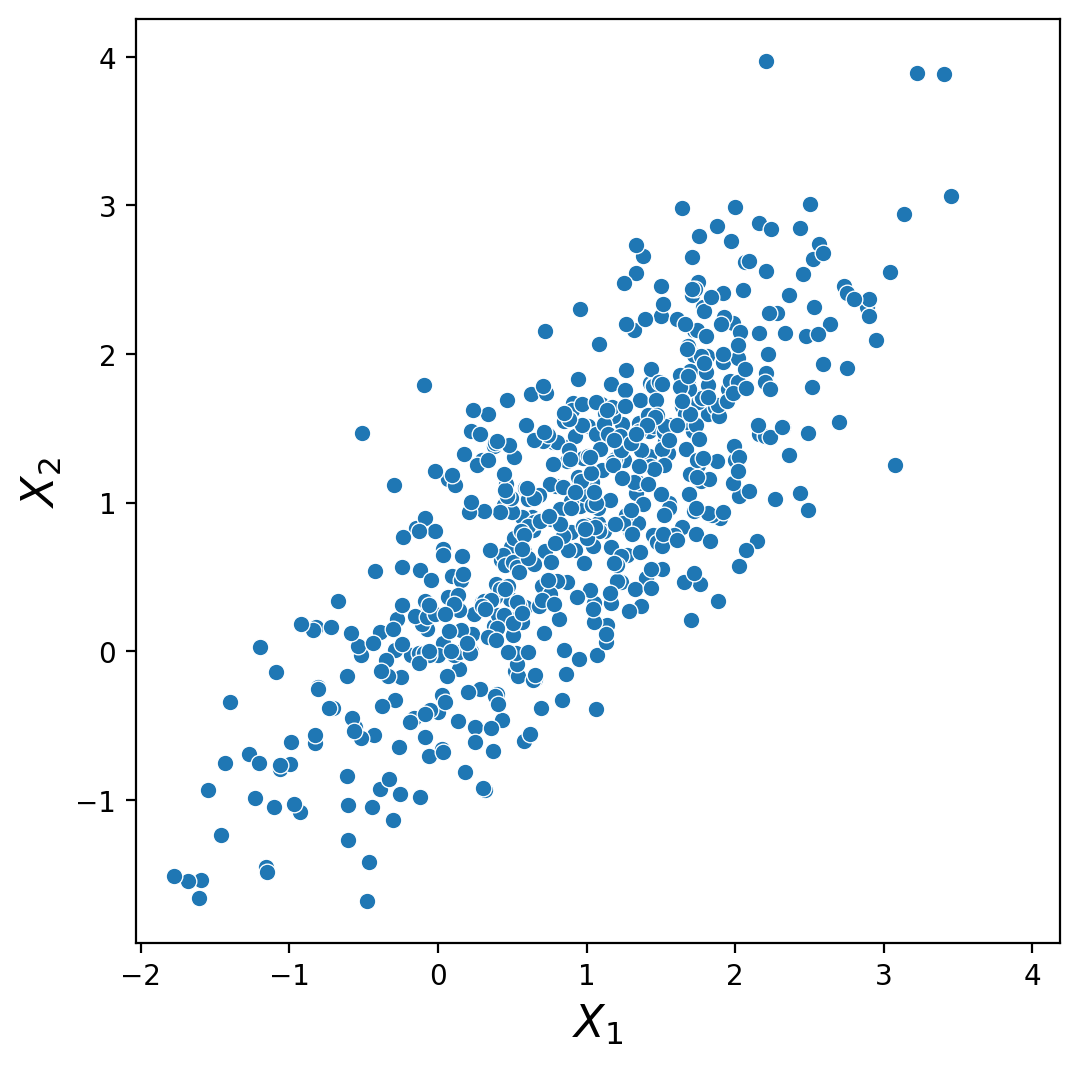

In [5]:
plt.figure(figsize = (6,6))
sns.scatterplot(data = df1, x = 'X1', y = 'X2')
plt.xlabel(r'$X_1$', fontsize=16);
plt.ylabel(r'$X_2$', fontsize=16);
plt.axis('square');

Yes! With observed data, the marginal distribution for an attribute can directly be found as the empirical distribution of that particular attribute while ignoring all others!

## Independence

### The Categorical Case

In a generic situation, if we want to specify a joint distribution, we need to specify the entire table of probabilities - one entry for each combination of possible values of the random variables.

To return to our previous example:

$$ P(\text{Grade}, \text{StudyEffort}) = $$

| |low|high|
|---|---|---|
|A| 0.07| 0.18|
|B| 0.28| 0.09|
|C|0.35| 0.03|

Note as well that we found the following marginal distributions:
    
|low|high|
|---|---|
| 0.70| 0.30|


|A|B|C|
|---|---|---|
| 0.25| 0.37| 0.38|

Let's consider a new situation.   Just for the purposes of discussion (and only for this purpose!) let's imagine that the amount that a student studies has no effect on the grade that they get.

We would then say:

$$ P(\text{Grade}\,\mid\, \text{StudyEffort}) = P(\text{Grade}).$$


In other words, we would say that $\text{StudyEffort}$ and $\text{Grade}$ are __independent.__

In that case, we conclude that:

$$ P(\text{Grade}, \text{StudyEffort}) = P(\text{Grade})\cdot P(\text{Study Effort}).$$


Although looking at $P(\text{Grade}, \text{StudyEffort})$ might be less intuitive than considering $P(\text{Grade}\,\mid\, \text{StudyEffort})$, $P(\text{Grade}, \text{StudyEffort})$ is the probability we need to work with to show that the variables are either dependent or independent.

Starting from the marginals 

|low|high|
|---|---|
| 0.70| 0.30|

and

|A|B|C|
|---|---|---|
| 0.25| 0.37| 0.38|

we can compute the new distribution (based on the independence assumption) as:
    
$$ P(\text{Grade}, \text{StudyEffort}) = $$

| |low|high|
|---|---|---|
|A| 0.175| 0.075|
|B| 0.259| 0.111|
|C|0.266| 0.114|


### The Numerical Case

Now let's look at one of our examples that involves numerical random variables.

Are $X_1$ and $X_2$ independent for this case?

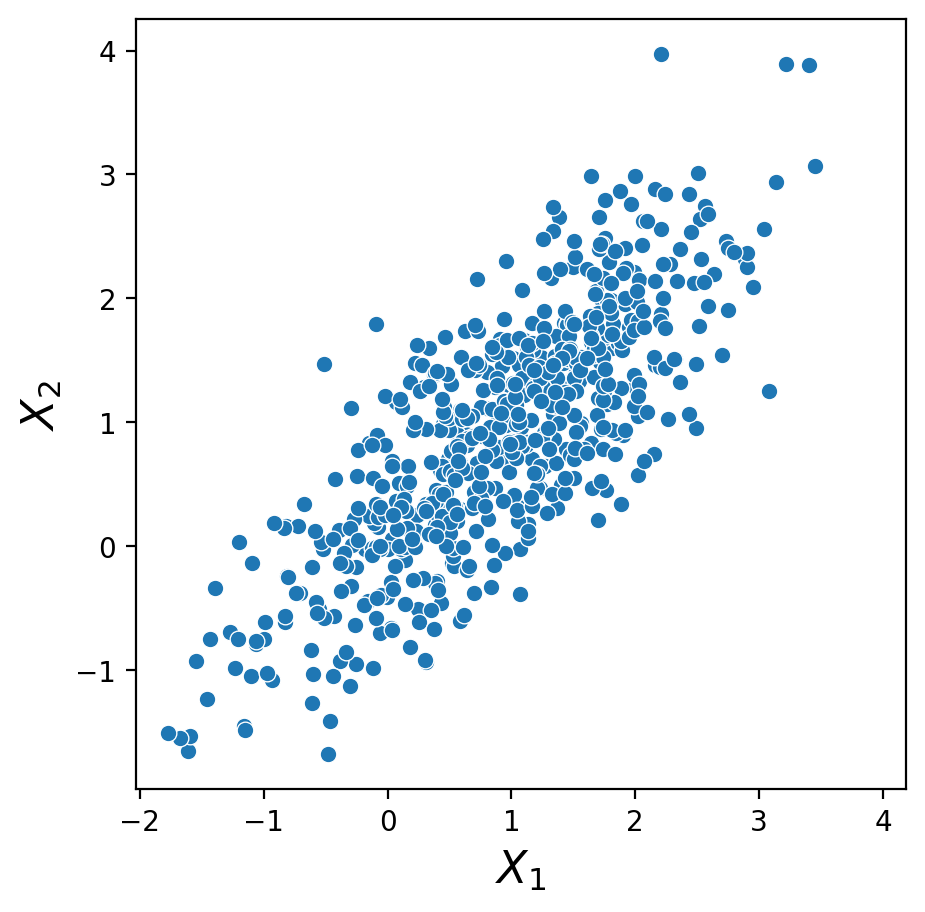

In [6]:
plt.figure(figsize = (5,5))
sns.scatterplot(data = df1, x = 'X1', y = 'X2')
plt.xlabel(r'$X_1$', fontsize=16);
plt.ylabel(r'$X_2$', fontsize=16);
plt.axis('square');

No - it's clear that if we know that $X_2 > 1$ , then the probability that $X_1 > 1$ increases.

That is,

$$ P(X_1 \text{ is large}\,\mid\,X_2 \text{ is large}) > P(X_1\text{ is large}) $$

so $X_1$ and $X_2$ are __not independent.__

Now consider these two datasets:

In [7]:
np.random.seed(4)
from scipy.stats import multivariate_normal
df2 = pd.DataFrame(multivariate_normal.rvs(mean = np.array([1, 1]), 
                                           cov = np.array([[1, 0],[0, 1]]), 
                                           size = 600),
                  columns = ['X1', 'X2'])

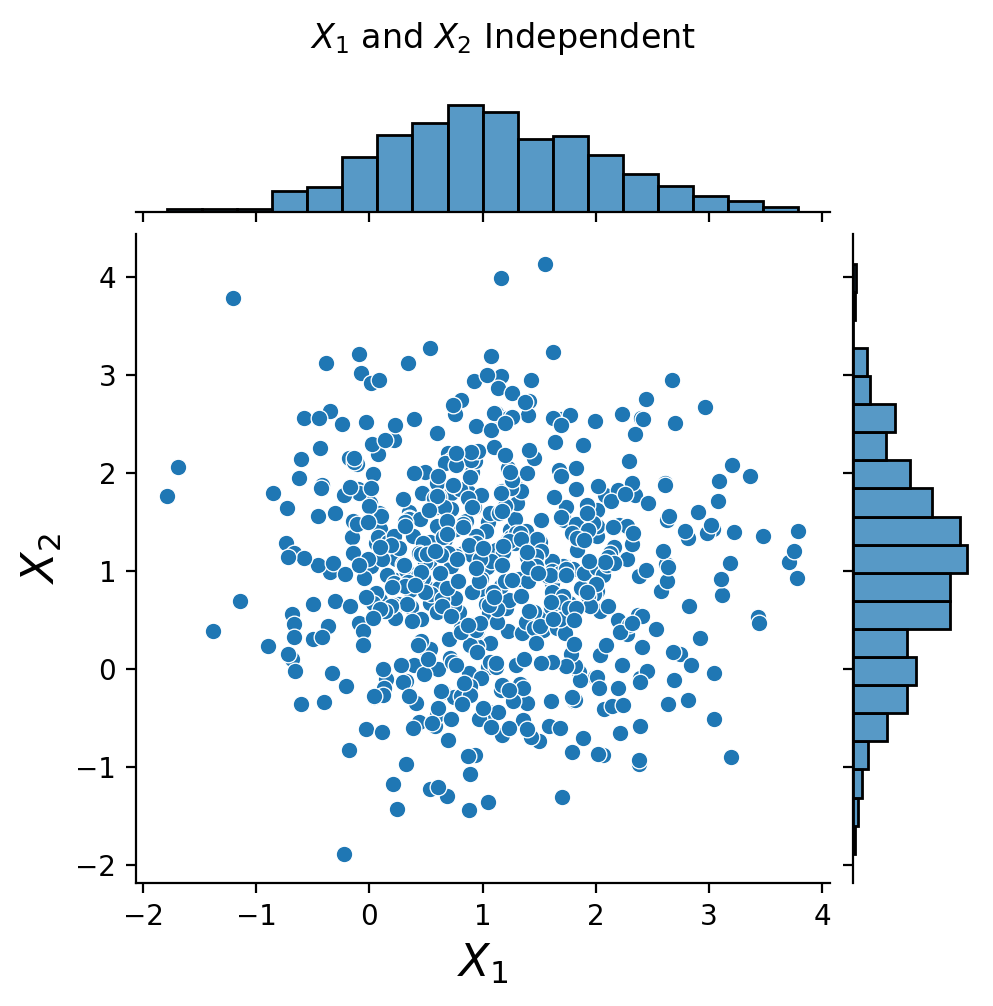

In [8]:
g = sns.JointGrid(data = df2, x = 'X1', y = 'X2', 
                   height = 5)
g.plot(sns.scatterplot, sns.histplot)
g.ax_joint.set_xlabel(r'$X_1$', fontsize=16)
g.ax_joint.set_ylabel(r'$X_2$', fontsize=16)
g.figure.subplots_adjust(top=0.9) # Reduce plot to make room 
plt.suptitle('$X_1$ and $X_2$ Independent');

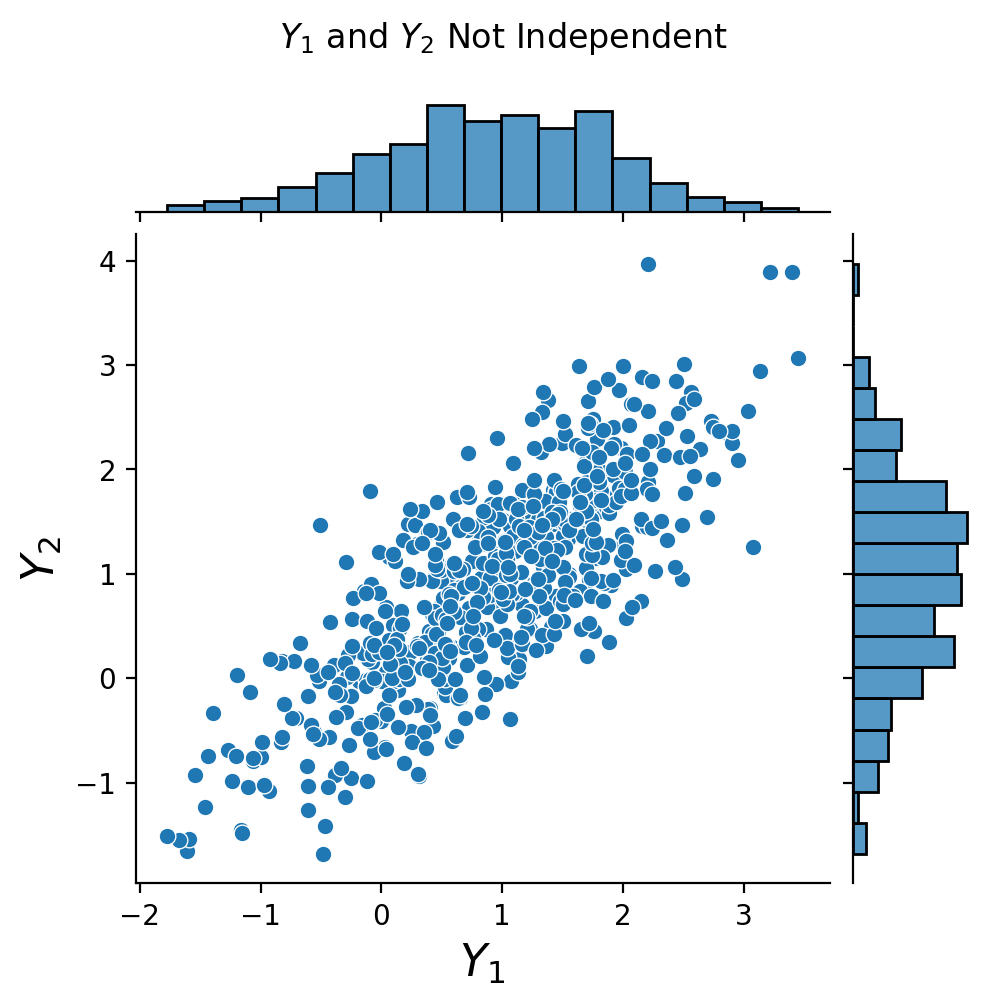

In [9]:
g = sns.JointGrid(data = df1, x = 'X1', y = 'X2', 
                   height = 5)
g.plot(sns.scatterplot, sns.histplot)
g.ax_joint.set_xlabel(r'$Y_1$', fontsize=16)
g.ax_joint.set_ylabel(r'$Y_2$', fontsize=16)
g.figure.subplots_adjust(top=0.9) # Reduce plot to make room 
plt.suptitle('$Y_1$ and $Y_2$ Not Independent');

Notice that they have approximately __the same marginals.__
However, for the first dataset, $X_1$ and $X_2$ are independent, but in the second case, $Y_1$ and $Y_2$ are not independent.

<!-- The independence is reflected in the symmetric nature of the joint distribution $P_{X_1,X_2}(x_1, x_2)$. -->

## Correlation

To describe the lack of independence between $X_1$ and $X_2$ above, we'd need to show that

<!-- $$ p_{X1|X2}(x_1 \,\mid\, X_2 = x_2) $$  -->
$$ p(x_1, x_2) = p_{X_1}(x_1)p_{X_2}(x_2).$$

for each value of $x_1$ and $x_2$.  

However, in many cases this is a non-trivial task.
<!-- However, in many cases this is either difficult to do, or it is too detailed to aid intuition. -->

The most common way to describe a relationship between random variables with a single number is __covariance.__

Covariance extends the concept of variance to multiple random variables.

The covariance of $X_1$ and $X_2$, denoted $\operatorname{Cov}(X_1, X_2)$ is defined as:
    
$$ \operatorname{Cov}(X_1, X_2) = E[(X_1 - \overline{X_1})(X_2 - \overline{X_2})] $$

where $\overline{X_1}$ and $\overline{X_2}$ are the means of $X_1$ and $X_2$.

We will often denote $\operatorname{Cov}(X,Y)$ as $\sigma_{XY}$.

Let's look at a specific example.  Here are the stock prices of two companies over a one-year period:

In [10]:
#import pandas_datareader.data as web
import yfinance as yf
from datetime import datetime

stocks = ['TSLA', 'YELP']
attr = 'Close'
# old code that broke mysteriously in Jan 2023:
# data_source = 'yahoo'
# df_stocks = web.DataReader(stocks, 
#                    data_source,                               
#                    start=datetime(2014, 1, 1), 
#                    end=datetime(2014, 1, 1))[attr]
 
df_stocks = yf.download('TSLA YELP', 
                        datetime(2014, 1, 1), 
                        datetime(2014, 12, 31), 
                        progress = False)['Close']

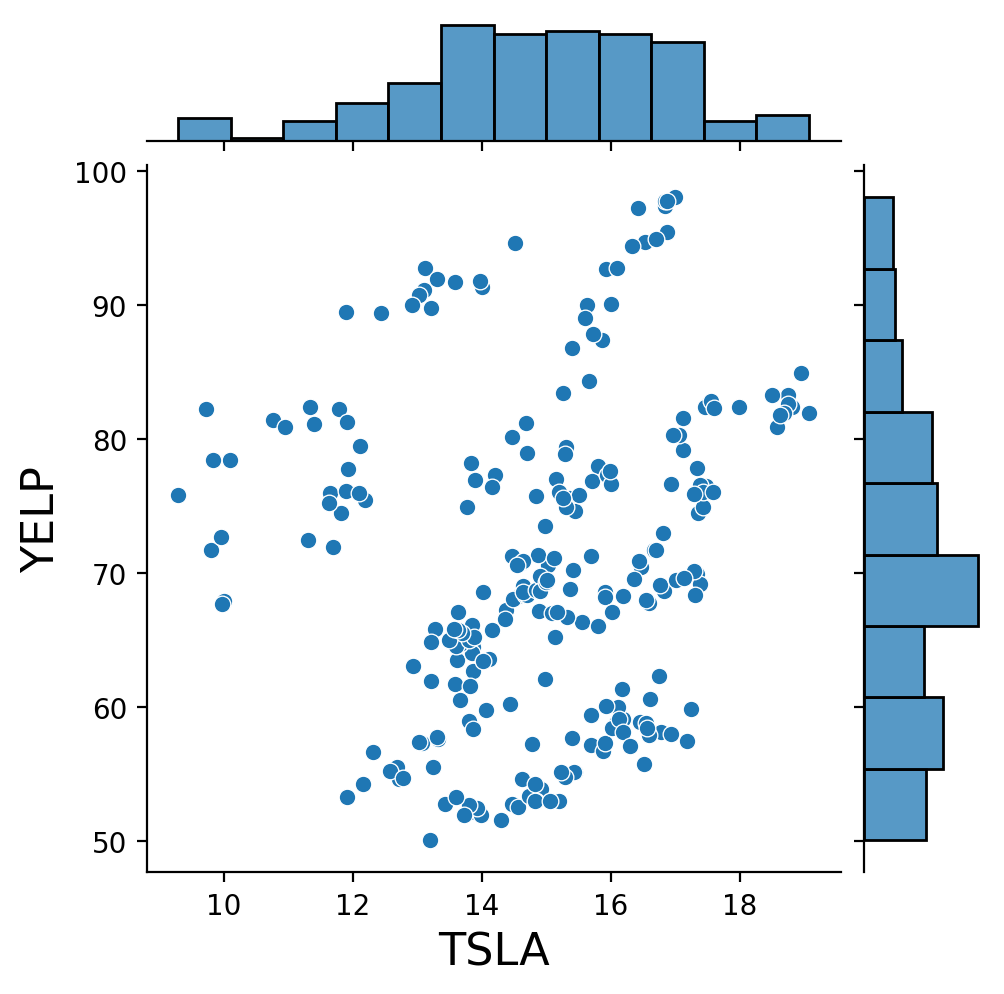

In [11]:
g = sns.JointGrid(data = df_stocks, x = 'TSLA', y = 'YELP', 
                   height = 5)
g.plot(sns.scatterplot, sns.histplot)
g.ax_joint.set_xlabel(r'TSLA', fontsize=16)
g.ax_joint.set_ylabel(r'YELP', fontsize=16);

Clearly, these two stock prices are not independent.

This is in large part because both stocks respond to overall market conditions:

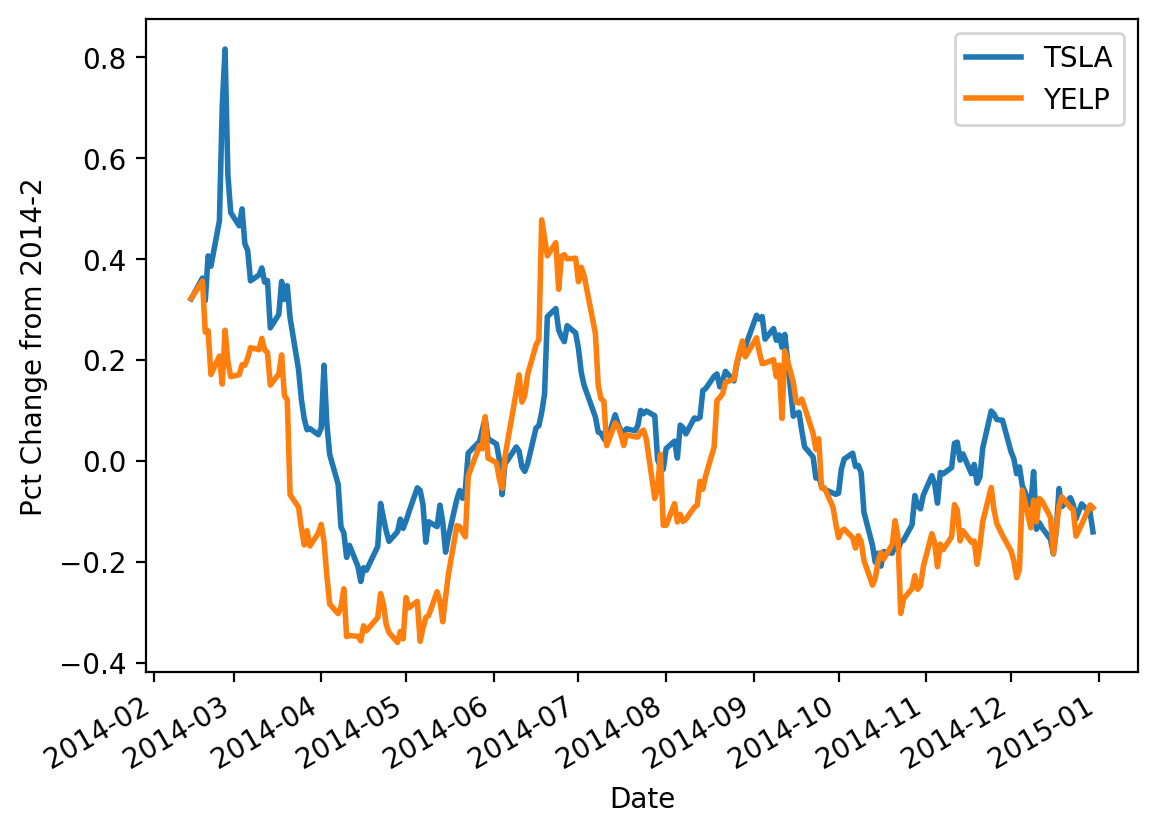

In [12]:
rets = df_stocks.pct_change(30)
rets[['TSLA', 'YELP']].plot(lw=2)
plt.ylabel('Pct Change from 2014-2')
plt.legend(loc='best');

One way to describe these two stocks is that they are "likely to be above their respective means at the same time."

That is, they "co-vary".

This is what is captured by covariance.

We know how to find the expected value of a random variable. But how exactly do we compute 

$$\operatorname{Cov}(X_1, X_2) = E[(X_1 - \overline{X_1})(X_2 - \overline{X_2})]?$$

For discrete $X_1$ and $X_2$ with joint probability $P(X_1=x_1, X_2=x_2) = p(x_1,x_2)$ the covariance is computed as

$$ \operatorname{Cov}(X_1, X_2) = \sum_{(x_1,x_2)\in S} (x_1 - \overline{X_1})(x_2 - \overline{X_2}) p(x_1,x_2). $$

Here, $S$ is the _support_ of $X_1$ and $X_2$.

Note: The covariance of two continuous random variables is outside the scope of this course.

Let us look at a simple example.

Suppose that $X$ and $Y$ have the joint probability mass function given below.

| | $x = 5$ |$x = 6$| $x = 7$| 
| :---: | :---: | :---: | :---: | 
| $y = 8$ | 0 | 0.4 | 0.1 |
| $y = 9$ | 0.3  | 0 | 0.2 | 

In this case, the support $S$ is equal to the set $\{(5,8),(6,8),(7,8), (5,9),(6,9),(7,9)\}.$

The marginal probabilities are given by
| | $x = 5$ |$x = 6$| $x = 7$| 
| :---: | :---: | :---: | :---: | 
| $p_X(x)$ | 0.3 | 0.4 | 0.3 |

| | $y = 8$ |$y = 9$| 
| :---: | :---: | :---: | 
| $p_Y(y)$ | 0.5 | 0.5 | 

The mean of $X$ can be computed using $p_X(x)$ as follows

$$\overline{X} = 5 \cdot 0.3 + 6 \cdot 0.4 + 7 \cdot 0.3 = 6.$$

Similarly, we find that $\overline{Y} = 8.5.$

Now it remains to compute the covariance itself

$$\operatorname{Cov}(X,Y) = (5-6)(8-8.5)(0) + (6-6)(8-8.5)(0.4) + (7-6)(8-8.5)(0.1)$$

$$+ (5-6)(9-8.5)(0.3) + (6-6)(9-8.5)(0) + (7-6)(9-8.5)(0.2) = -0.1.$$

We typically "normalize" covariance by the standard deviations of the random variables.

This is called "correlation coefficient" or "Pearson's correlation coefficient" or "Pearson's $\rho$":

$$\rho(X_1,X_2) = \frac{E\left[(X_1-\overline{X_1})(X_2-\overline{X_2})\right]}{\sigma_{X_1} \sigma_{X_2}}$$


As we will see later on, another way to think of correlation coefficient is:
    
"How well could a linear model predict one random variable, given the other?"

Because it is normalized, $\rho(X_1, X_2)$ takes on values between -1 and 1.   

If $\rho(X_1, X_2) = 0$ then $X_1$ and $X_2$ are __uncorrelated__.   

If $\rho(X_1, X_2) > 0$ then $X_1$ and $X_2$ are __positively correlated__, and if $\rho(X_1, X_2) < 0$ they are __anticorrelated.__

Now: (this is important!):
        
If $X_1$ and $X_2$ are uncorrelated, are they independent?

In general, __NO__.

If $X_1$ and $X_2$ are uncorrelated, that means the relationship between them can't be predicted by __a linear model.__

However, this does not mean that they are necessarily independent!

<!--- Excellent discussion: https://stats.stackexchange.com/questions/179511/why-zero-correlation-does-not-necessarily-imply-independence --->
        

Here is a simple example:  the points below are uniformly scattered within the circle.

In [13]:
np.random.seed(3)

U1 = np.random.uniform(size = 5000)
U2 = np.random.uniform(size = 5000)
r = 1
X = r * np.sqrt(U2) * np.cos(2 * np.pi * U1)
Y = r * np.sqrt(U2) * np.sin(2 * np.pi * U1)

df_circle = pd.DataFrame(np.column_stack([X, Y]), columns = ['X1', 'X2'])
df_rand_circle = pd.DataFrame(np.column_stack([X, np.random.permutation(Y)]), 
                              columns = ['X1', 'X2'])

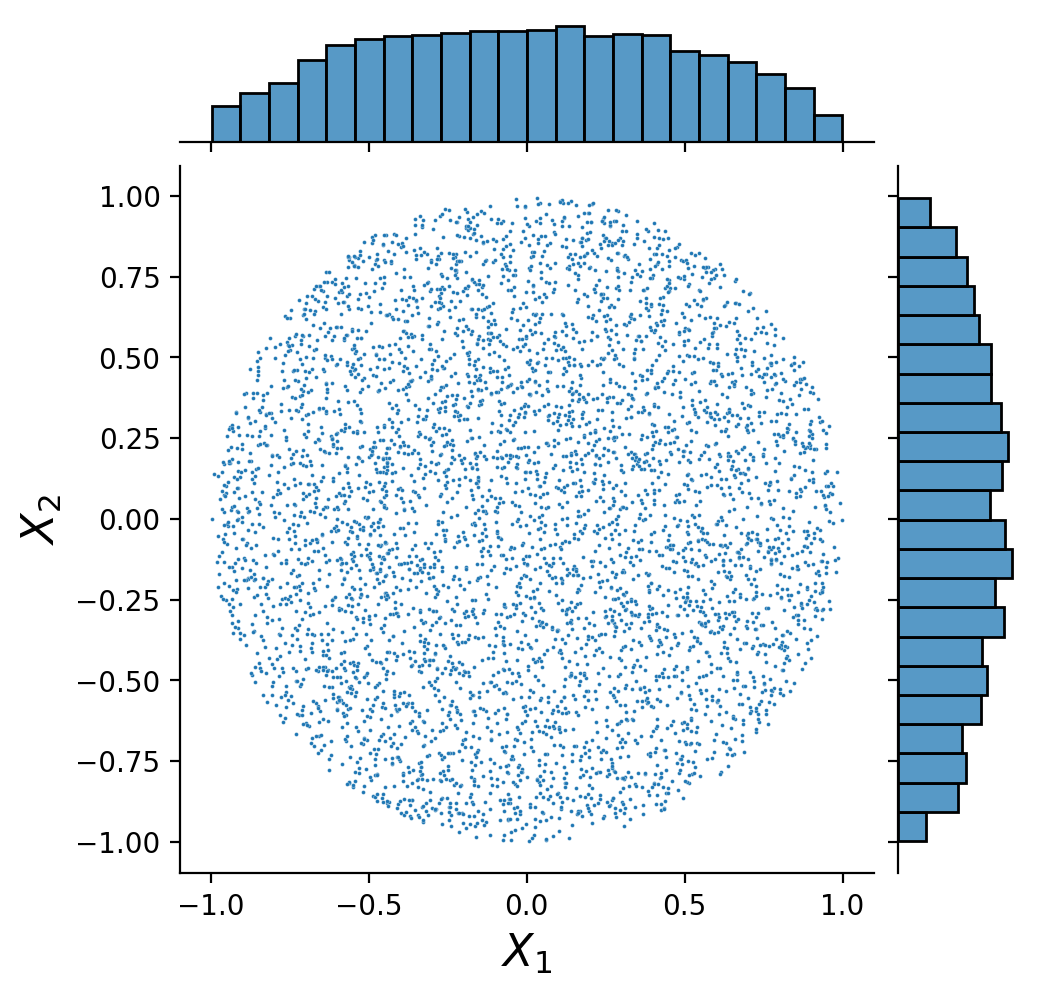

In [14]:
g = sns.JointGrid(data = df_circle, x = 'X1', y = 'X2', 
                   height = 5)
g.plot_joint(sns.scatterplot, s = 2)
g.plot_marginals(sns.histplot) 
g.ax_joint.set_xlabel(r'$X_1$', fontsize=16)
g.ax_joint.set_ylabel(r'$X_2$', fontsize=16);

There is no linear model that captures any relationship betwen $X_2$ and $X_1$.  (Can you see why?)

Hence, $X_1$ and $X_2$ will have $\rho(X_1,X_2) = 0$.

However, $X_1$ and $X_2$ most definitely are __not__ independent.

We can see that by constructing data with the same marginals, from a joint distribution that __is__ independent:

<!--- Note: df_circle.corr(method = 'pearson') gives zero to two decimal places --->

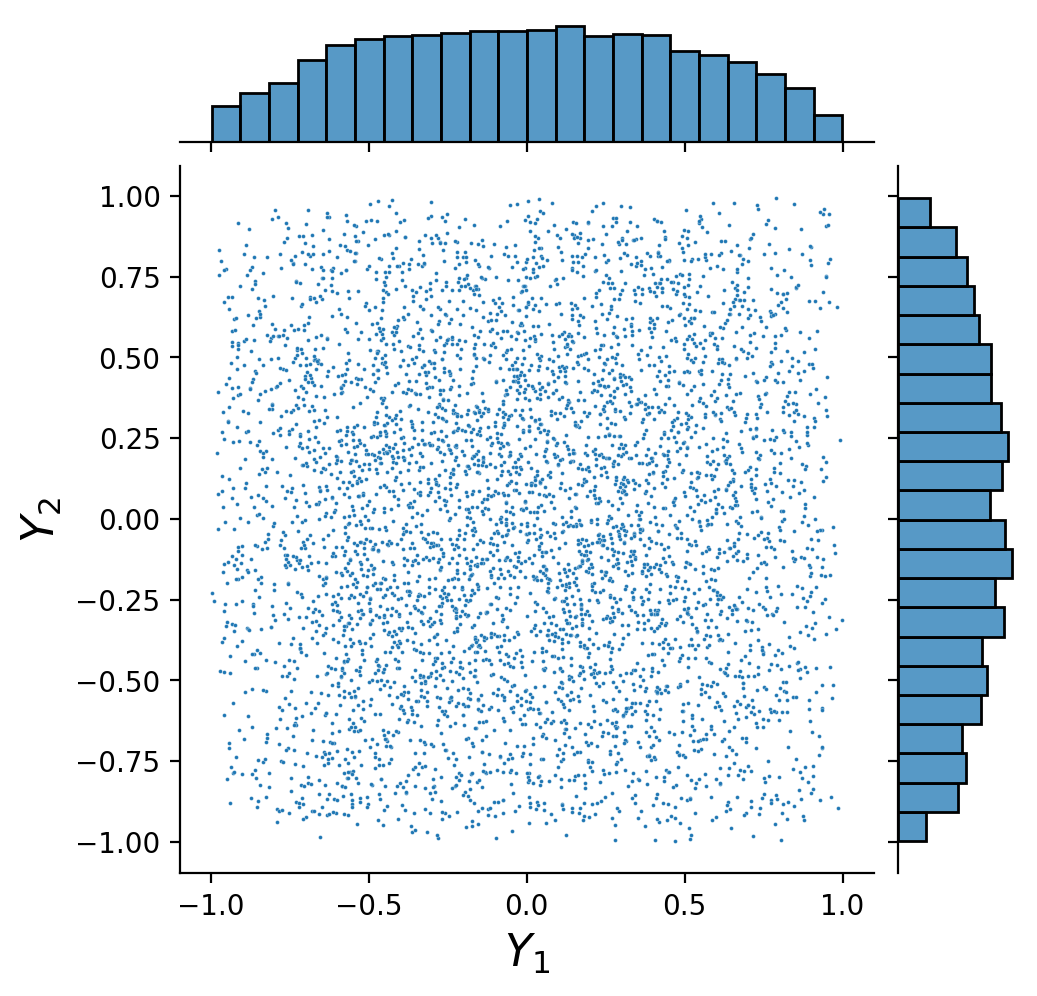

In [15]:
g = sns.JointGrid(data = df_rand_circle, x = 'X1', y = 'X2', 
                   height = 5)
g.plot_joint(sns.scatterplot, s = 2)
g.plot_marginals(sns.histplot) 
g.ax_joint.set_xlabel(r'$Y_1$', fontsize=16)
g.ax_joint.set_ylabel(r'$Y_2$', fontsize=16);

Here is a rule of thumb when working with correlation:
* If $X_1$, $X_2$ are independent, then they have a zero correlation coefficient.
* If $X_1$, $X_2$ have a zero correlation coefficient, they are __possibly,__ but __not necessarily__ independent.

More generally, keep in mind that when you use Pearson's $\rho$, you are __making a linear assumption__ about the data. 

This can be highly misleading if you are not aware of the structure present in your data.

````{margin}
```{note}  This example is called Anscombe's Quartet.
Image source: https://en.wikipedia.org/wiki/Anscombe%27s_quartet
```
````

Let's look at a classic example of four datasets, each of which has the same correlation coefficient:

<center>
    
<img src="images/Anscombe's_quartet_3.png" alt="Die" width="600px">
    
</center>

In this example, for the two datasets on the right, a linear model does not seem appropriate.

And for the dataset in the lower left, the linear model is misleading because of the outlier.

However all four datasets have the __same correlation coefficient (0.816)!__

This example shows the importance of __looking at your data__ before beginning to analyze it.

## Random Vectors

We will often collect a set of random variables into a vector, naturally called a __random vector.__

To do this, we need to define the linear algebra of random vectors.   This will be a straightforward extension of the usual notion of vectors.

### Definitions

A random vector $\mathbf{x}$ is a collection of random variables, denoted

$$ \mathbf{x} = \left[\begin{array}{c}X_1\\X_2\\\vdots\\X_n\end{array}\right] $$


In an experiment where we can measure random outcomes $X_1$ and $X_2$, we define the random variable $X_1 + X_2$ to be the random outcome we get when we sum the measures $X_1$ and $X_2$.  

In the frequentist interpretation of "independent trials under identical conditions", each time we perform a trial we sum the values of $X_1$ and $X_2$ for that trial.

Likewise, we will define the product $a X_1$, where $a$ is a (non-random) scalar value, as the random variable corresponding to observing $X_1$ and then multiplying that observation by $a$.

With these definitions, we can construct a vector space as follows:
    
For 

$$\mathbf{x} = \left[\begin{array}{c}X_1\\X_2\\\vdots\\X_n\end{array}\right] \text{ and  } \mathbf{y} = \left[\begin{array}{c}Y_1\\Y_2\\\vdots\\Y_n\end{array}\right]$$

We define:


$$\mathbf{x} + \mathbf{y} = \left[\begin{array}{c}X_1 + Y_1\\X_2 + Y_2\\\vdots\\X_n + Y_n\end{array}\right]$$



$$ a\mathbf{x} =\left[\begin{array}{c}aX_1\\aX_2\\\vdots\\aX_n\end{array}\right]$$


### Properties of Random Vectors

It is straightforward to define the __expectation__ or __mean__ of a random vector:
    
$$ E[\mathbf{x}] = \left[\begin{array}{c}E[X_1]\\E[X_2]\\\vdots\\E[X_n]\end{array}\right] = \mathbf{\mu}. $$

Note that $\mathbf{\mu}$ is a vector, but it is not random (it is a "regular" vector).

What about __variance__?

It's important to keep in mind that components of the random vector $\mathbf{x}$ may be correlated.

So in general we want to know about all the possible correlations in $\mathbf{x}$. 

This leads us to define the __covariance matrix:__
    
$$\Sigma = \operatorname{Cov}(\mathbf{x}) = 
\left[\begin{array}{cccc}
      \sigma_{11}&\sigma_{12}&\dots&\sigma_{1n}\\
      \sigma_{21}&\sigma_{22}&\dots&\sigma_{2n}\\
      \vdots & \vdots & \ddots & \vdots\\
      \sigma_{n1}&\sigma_{n2}&\dots&\sigma_{nn}\\
      \end{array}\right]$$

where $\sigma_{ij} = \operatorname{Cov}(X_i, X_j)$.

Note that this definition implies that the variances of the components of $\mathbf{x}$ lie on the diagonal of the covariance matrix $\Sigma$.

That is, $\sigma_{ii} = \operatorname{Var}(X_i).$

A random vector is referred to as __singular__ or __nonsingular__ depending on whether its covariance matrix $\Sigma$ is singular or nonsingular.

Let's return to a previous example, and now interpret things in terms of random vectors.

We will say that $\mathbf{x} = \left[\begin{array}{c}X_1\\X_2\end{array}\right]$ 

Now, however, instead of thinking of these plots as scatterplots of $X_1$ vs $X_2$ observations, we think of each point as __an observation of the random vector__ $\mathbf{x}$ .

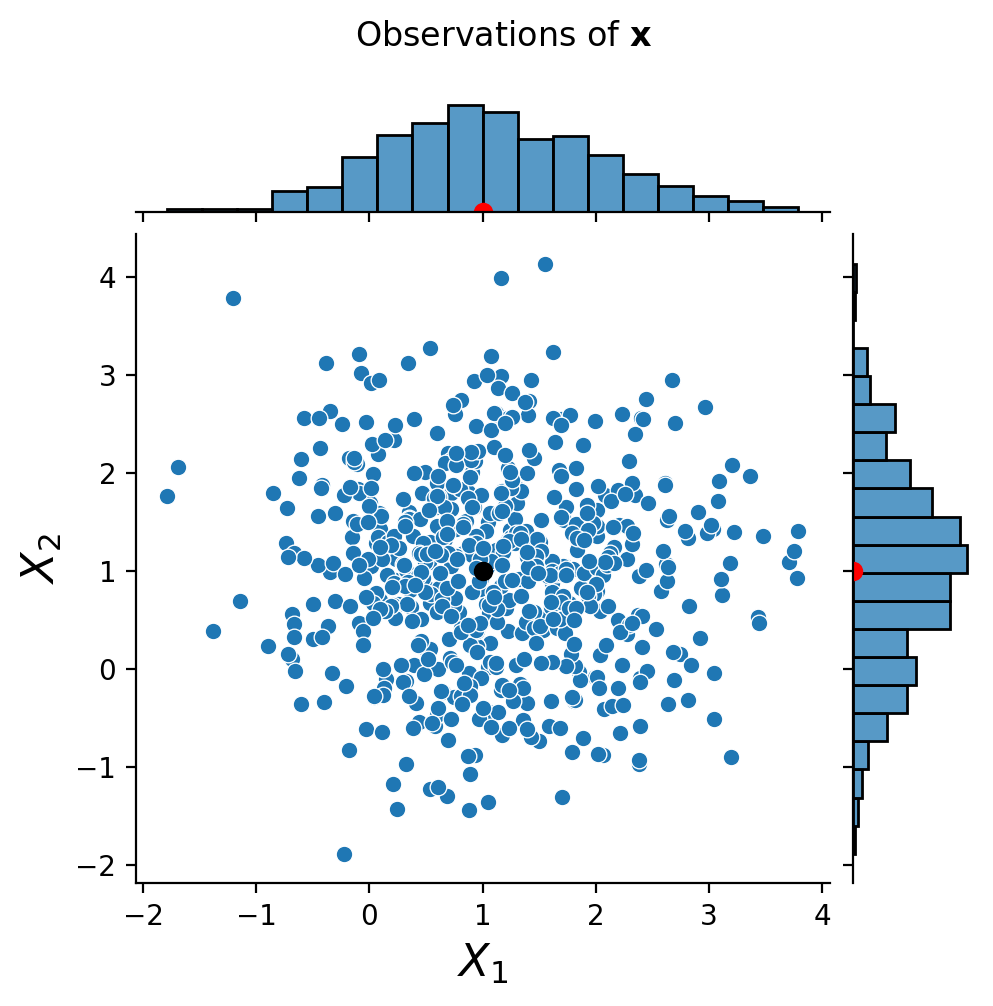

In [16]:
g = sns.JointGrid(data = df2, x = 'X1', y = 'X2', 
                   height = 5)
g.plot(sns.scatterplot, sns.histplot)
g.ax_joint.set_xlabel(r'$X_1$', fontsize=16)
g.ax_joint.set_ylabel(r'$X_2$', fontsize=16)
g.ax_joint.plot(1, 1, 'ko', markersize = 6)
g.ax_marg_x.plot(1, 0, 'ro')
g.ax_marg_y.plot(0, 1, 'ro')
g.figure.subplots_adjust(top=0.9) # Reduce plot to make room 
plt.suptitle('Observations of $\mathbf{x}$');

What is the mean of this random vector?

We've found the mean of each marginal (marked in red dots).  Both marginals have mean 1.

So the mean of the random vector $\mathbf{x}$ is 

$$\mathbf{\mu_x} = \left[\begin{array}{c}E[X_1]\\E[X_2]\end{array}\right] = \left[\begin{array}{c}1\\1\end{array}\right].$$

The mean $\mathbf{\mu_x}$ is marked with a black dot.

What is the covariance matrix of this random vector?

When we compute the covariance matrix we get

$$\Sigma_\mathbf{x} = 
\left[\begin{array}{cc}
      \sigma_{11}&\sigma_{12}\\
      \sigma_{21}&\sigma_{22}\\
      \end{array}\right] = 
\left[\begin{array}{cc}
      1&0\\
      0&1\\
      \end{array}\right]$$

The off-diagonal elements are zero, which is what we expect since we know that $X_1$ and $X_2$ are independent.

So when the components of a random vector are independent, its covariance matrix is a diagonal matrix.

Now, let's also define $\mathbf{y} = \left[\begin{array}{c}Y_1\\Y_2\end{array}\right]$.

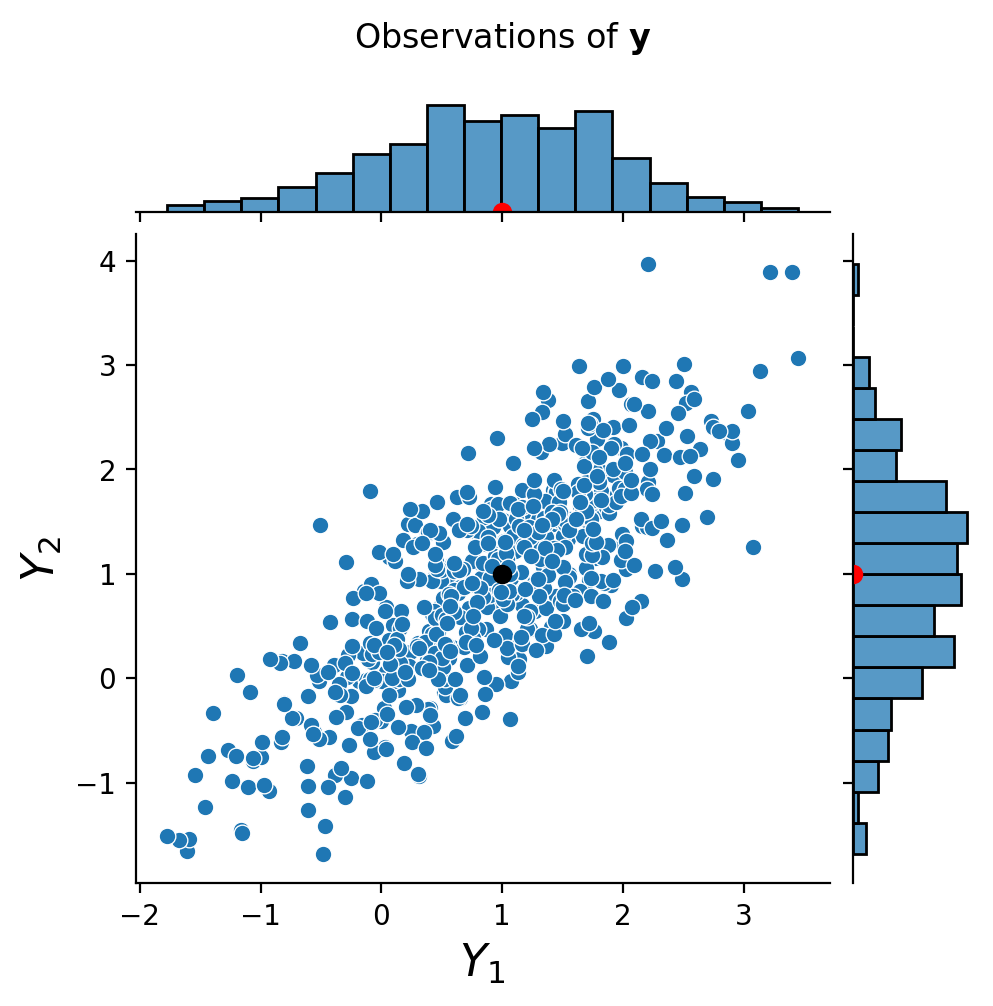

In [17]:
g = sns.JointGrid(data = df1, x = 'X1', y = 'X2', 
                   height = 5)
g.plot(sns.scatterplot, sns.histplot)
g.ax_joint.set_xlabel(r'$Y_1$', fontsize=16)
g.ax_joint.set_ylabel(r'$Y_2$', fontsize=16)
g.ax_joint.plot(1, 1, 'ko', markersize = 6)
g.ax_marg_x.plot(1, 0, 'ro')
g.ax_marg_y.plot(0, 1, 'ro')
g.figure.subplots_adjust(top=0.9) # Reduce plot to make room 
plt.suptitle('Observations of $\mathbf{y}$');

This random vector $\mathbf{y}$ has that same mean as $\mathbf{x}$:
    
$$\mathbf{\mu_y} = \left[\begin{array}{c}1\\1\end{array}\right].$$

However the covariance matrix $\Sigma_\mathbf{y}$ is quite different:
    
$$\Sigma_\mathbf{y} = 
\left[\begin{array}{cc}
      1&0.8\\
      0.8&1\\
      \end{array}\right]$$

The off-diagonal elements of $\Sigma_\mathbf{y}$ are nonzero, which is not surprising as we know that $Y_1$ and $Y_2$ are not independent.

Finally, we can ask whether $\Sigma_\mathbf{y}$ is singular.  

One way would be to compute its eigenvalues.  (We could also check its determinant.)

We find that the eigenvalues of $\Sigma_\mathbf{y}$ are 1.8 and 0.2.  Since neither one is zero, we conclude that $\Sigma_\mathbf{y}$ is nonsingular, and so $\mathbf{y}$ is nonsingular. 

So in general we conclude that:
- When the components of a random vector are independent, its covariance matrix is a diagonal matrix.
- When the components of a random vector are not independent, the covariance matrix will generally not be a diagonal matrix. (But remember, it is still possible -- dependent random variables can have zero correlation!)

```Bonus material:```

### Multivariate Normal

A very commonly-encountered case will be a random vector that is __multivariate normal__ or __multivariate Gaussian.__

__Definition.__ 

Let $\mathbf{z} = \left[\begin{array}{c}Z_1\\\vdots\\Z_n\end{array}\right]$ where $Z_1, \dots, Z_n$ are independent, identically-distributed (i.i.d.) normal (Gaussian) random variables having mean zero and unit variance. 

Note that $\mu_\mathbf{z} = \mathbf{0}$ and $\Sigma_\mathbf{z} = I$.

Then we say that $\mathbf{y}$ has an $r$-dimensional __multivariate normal distribution__ if $\mathbf{y}$ has the same distribution as $A\mathbf{z} + \mathbf{b}$, for some $r \times n$ matrix $A$, and some vector $b \in \mathbb{R}^r$.

In other words, each component of $\mathbf{y}$ is a linear combination of standard normal random variables, plus a constant.

We indicate the multivariate normal distribution of $\mathbf{y}$ by writing $\mathbf{y} \sim N(\mathbf{b},AA^T)$.

As discussed previously, the central limit theorem tells us that the sum of normal random variables is also a normal random variable.

So, the components of $\mathbf{y}$ are normal random variables.

Notice two key things here:
* the constant vector $\mathbf{b}$ that we add becomes the mean vector of $\mathbf{y}$.
* the covariance matrix $\Sigma$ of $\mathbf{y}$ is equal to $AA^T$.

__Example.__

As it happens, the examples we have been using so far are actually examples of multivariate normal distributions.

We have 

$$\mathbf{x} \sim N(\mathbf{\mu_x}, \Sigma_\mathbf{x})$$

where $\mathbf{\mu_x} = \left[\begin{array}{c}1\\1\end{array}\right]$ and $\Sigma_\mathbf{x} = 
\left[\begin{array}{cc}
      1&0\\
      0&1\\
      \end{array}\right]$,
      
and 

$$\mathbf{y} \sim N(\mathbf{\mu_y}, \Sigma_\mathbf{y})$$

where $\mathbf{\mu_y} = \left[\begin{array}{c}1\\1\end{array}\right]$ and $\Sigma_\mathbf{y} = 
\left[\begin{array}{cc}
      1&0.8\\
      0.8&1\\
      \end{array}\right]$,

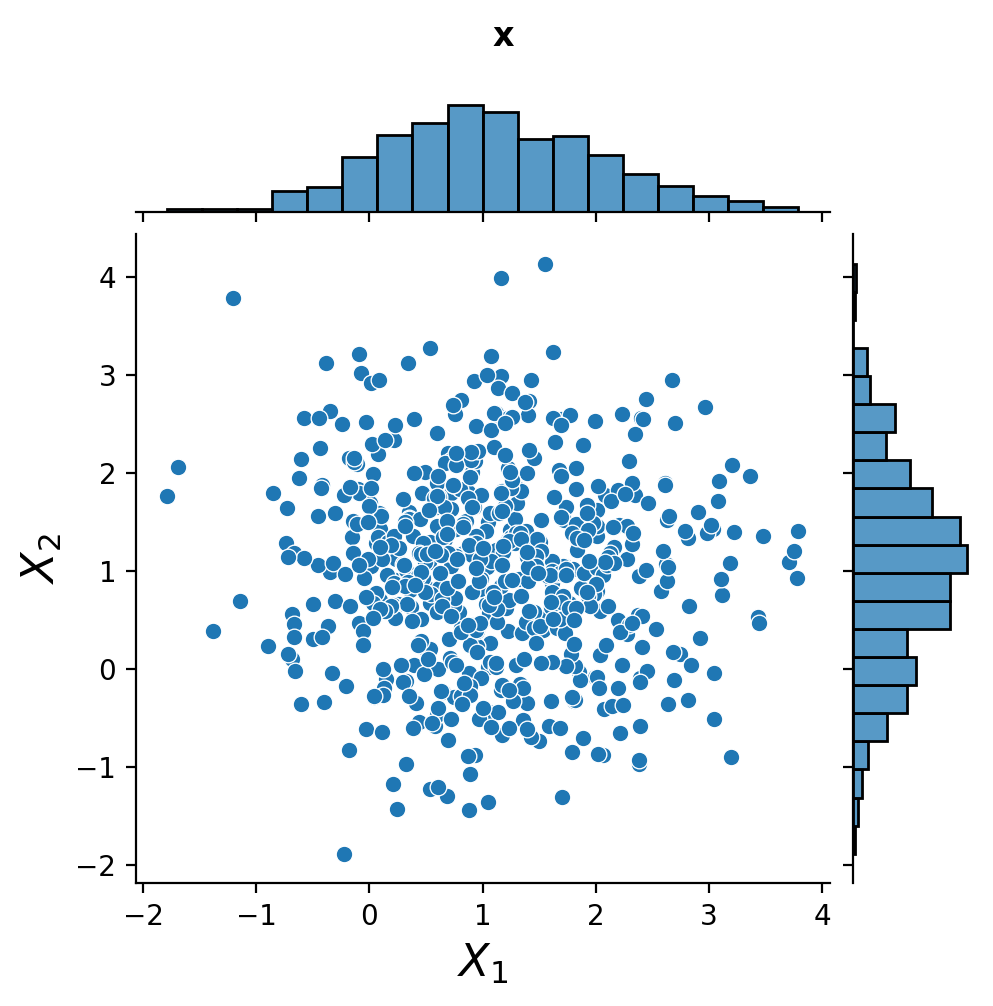

In [18]:
g = sns.JointGrid(data = df2, x = 'X1', y = 'X2', 
                   height = 5)
g.plot(sns.scatterplot, sns.histplot)
g.ax_joint.set_xlabel(r'$X_1$', fontsize=16)
g.ax_joint.set_ylabel(r'$X_2$', fontsize=16)
g.figure.subplots_adjust(top=0.9) # Reduce plot to make room 
plt.suptitle(r'$\mathbf{x}$');

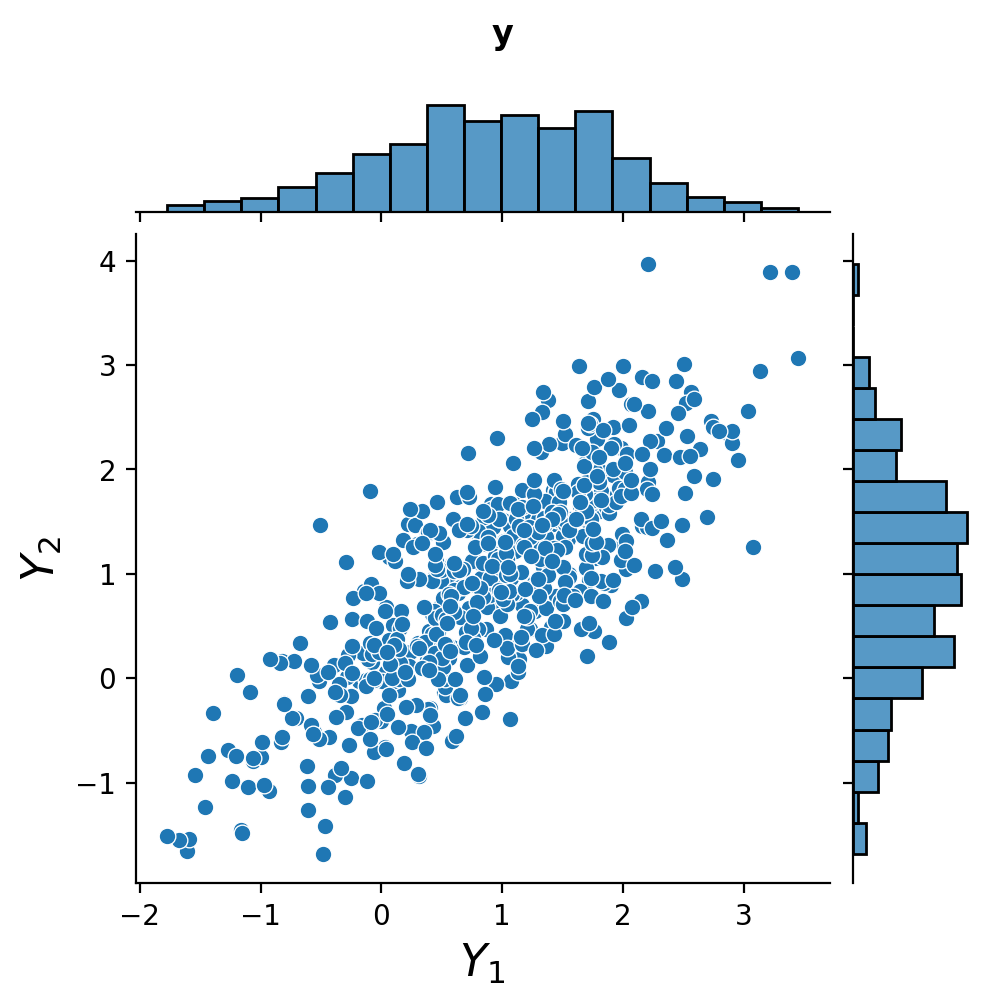

In [19]:
g = sns.JointGrid(data = df1, x = 'X1', y = 'X2', 
                   height = 5)
g.plot(sns.scatterplot, sns.histplot)
g.ax_joint.set_xlabel(r'$Y_1$', fontsize=16)
g.ax_joint.set_ylabel(r'$Y_2$', fontsize=16)
g.figure.subplots_adjust(top=0.9) # Reduce plot to make room 
plt.suptitle('$\mathbf{y}$');

Notice that the marginal distributions are Gaussian.

#### An Important Property of the Multivariate Normal

One of the reasons that the multivariate normal is nice to work with is the following.

__Theorem.__

If $\mathbf{y} \sim N(\mathbf{\mu}, \Sigma)$ and $\mathbf{y} = \left[\begin{array}{c}Y_1\\Y_2\end{array}\right]$, then $\operatorname{Cov}(Y_1, Y_2) = 0$ if and only if $Y_1$ and $Y_2$ are independent.

<!--- One proof is in Christensen, Plane Answers to Complex Questions, page 7 --->

We will not prove this (though it's not hard to prove.)

Note that what this theorem is saying is that multivariate normal is a __special case.__  

Although $\operatorname{Cov} = 0$ does not imply independence in general, for the multivariate normal, __it does.__

So we can conclude, whenever working with multivariate normals, that if a covariance term in $\Sigma$ is zero, then the corresponding components are independent.